In [12]:

#Loading dataset
import pandas as pd
data = pd.read_csv('C:/Users/COMPUMARTS/OneDrive/Desktop/Elevvo Pathways ML Internship/Tasks/covertype.csv')
x = data.drop("Cover_Type", axis=1)
y = data["Cover_Type"]
data
# data.columns to show all columns

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [13]:
#We will split the data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42,stratify=y)

In [18]:
#Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# The logistic regression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(max_iter=300)
logistic.fit(x_train_scaled, y_train)
logistic_pred = logistic.predict(x_test_scaled)

In [19]:
# Support Vector Machine "SVM"
from sklearn.svm import LinearSVC
svm = LinearSVC(max_iter=3000)
svm.fit(x_train_scaled, y_train)
svm_pred = svm.predict(x_test_scaled)

In [20]:
# Random forest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier( objective="multi:softmax",
    num_class=7,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    eval_metric="mlogloss")

y_train_xgb = y_train - 1
y_test_xgb = y_test - 1
xgb.fit(x_train, y_train_xgb)
xgb_pred = xgb.predict(x_test) + 1

In [21]:
# The evaluation 
from sklearn.metrics import accuracy_score
print("Logistic Regression:", accuracy_score(y_test, logistic_pred))
print("SVM:", accuracy_score(y_test, svm_pred))
print("Random Forest:", accuracy_score(y_test, rf_pred))
print("XGBoost:", accuracy_score(y_test, xgb_pred))


Logistic Regression: 0.7235527482078776
SVM: 0.7114188101856235
Random Forest: 0.9541836269287368
XGBoost: 0.8421813550424688


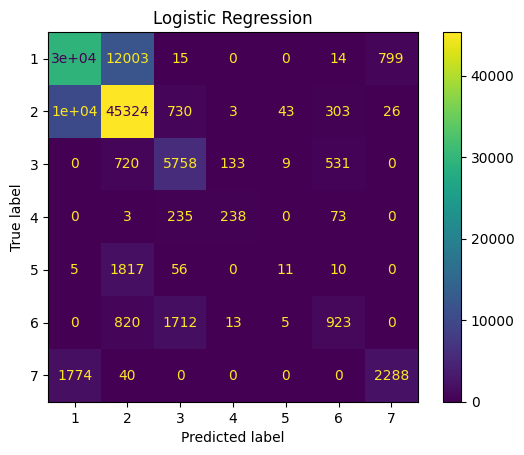

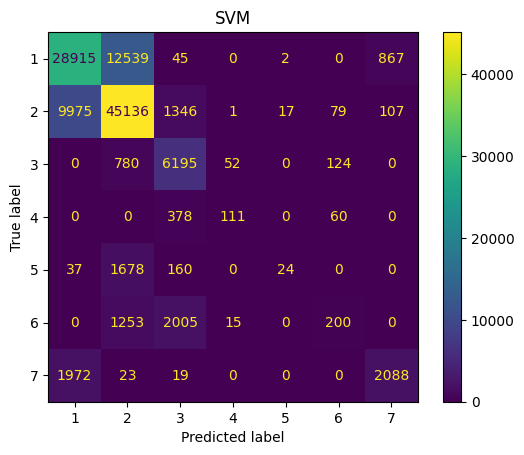

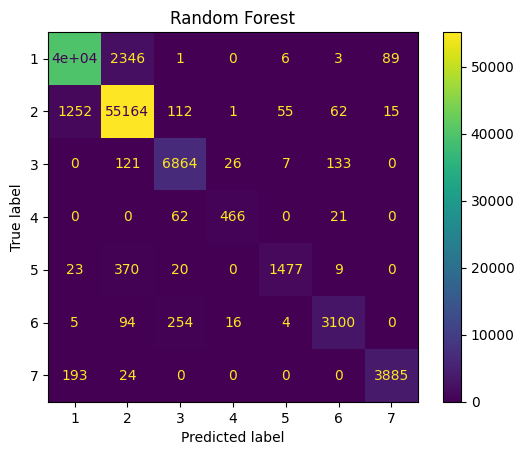

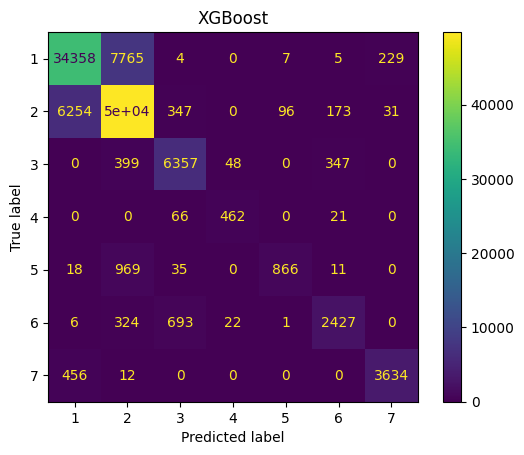

In [22]:
# The Visualization 
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_test, logistic_pred)
plt.title("Logistic Regression")
plt.show()
ConfusionMatrixDisplay.from_predictions(y_test, svm_pred)
plt.title("SVM")
plt.show()
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred)
plt.title("Random Forest")
plt.show()
ConfusionMatrixDisplay.from_predictions(y_test, xgb_pred)
plt.title("XGBoost")
plt.show()

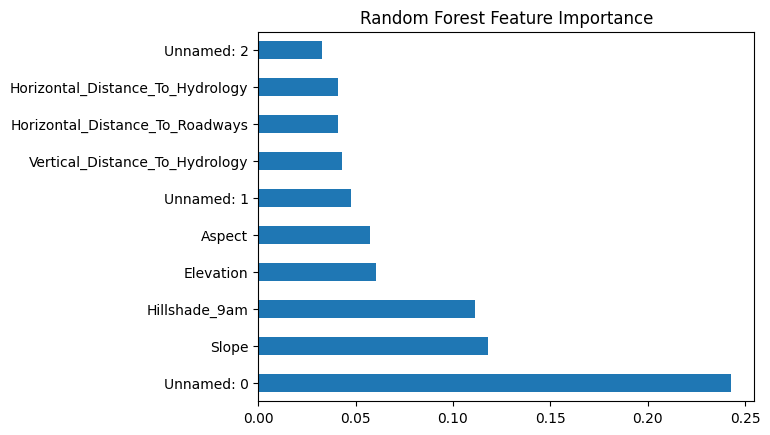

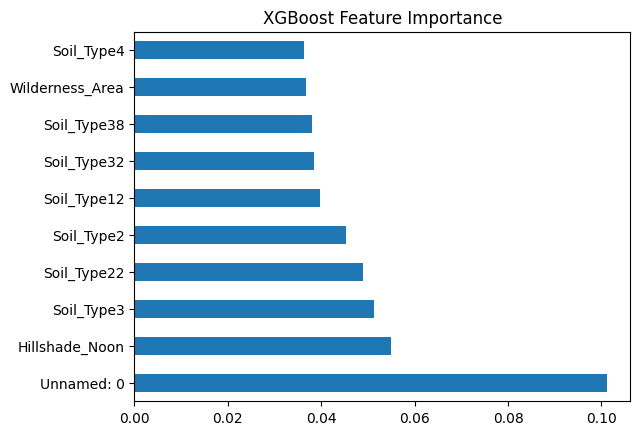

In [25]:
rf_importance = pd.Series(rf.feature_importances_, index=x.columns)
rf_importance.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("Random Forest Feature Importance")
plt.show()
xgb_importance = pd.Series(xgb.feature_importances_, index=x.columns)
xgb_importance.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("XGBoost Feature Importance")
plt.show()

In [28]:
#Hyperparameter Tuning for XGBoost
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [4], 'learning_rate': [0.1], 'n_estimators': [100]}

grid = GridSearchCV(
    XGBClassifier(objective="multi:softmax", num_class=7, eval_metric="mlogloss"),
    param_grid,
    cv=2,
    scoring="accuracy",
    n_jobs=-1
)
grid.fit(x_train, y_train_xgb)
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Best Accuracy: 0.7662824972042682


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.723553   0.711158  0.723553  0.713794
1                  SVM  0.711419   0.702761  0.711419  0.695560
2        Random Forest  0.954184   0.954330  0.954184  0.953956
3              XGBoost  0.842181   0.842594  0.842181  0.840773


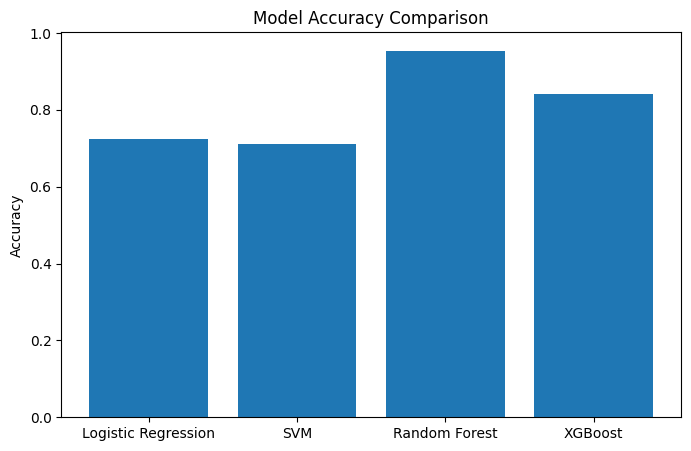

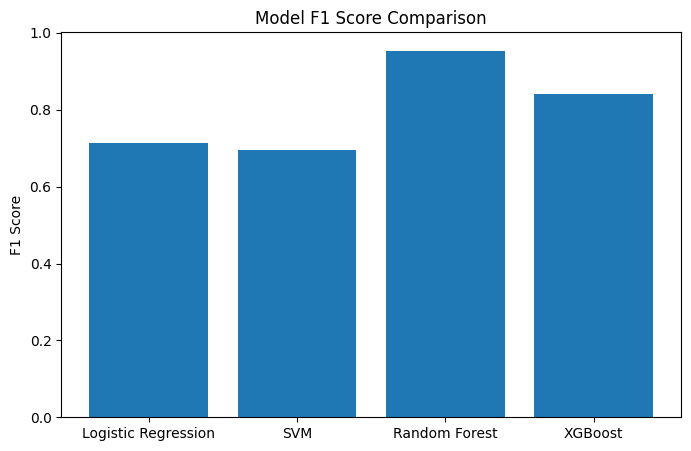

In [ ]:
#Comparison of Models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
models = ["Logistic Regression", "SVM", "Random Forest", "XGBoost"]
preds = [logistic_pred, svm_pred, rf_pred, xgb_pred]
accuracy = []
precision = []
recall = []
f1 = []
for p in preds:
    accuracy.append(accuracy_score(y_test, p))
    precision.append(precision_score(y_test, p, average="weighted"))
    recall.append(recall_score(y_test, p, average="weighted"))
    f1.append(f1_score(y_test, p, average="weighted"))

comparison = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
})
print(comparison)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(comparison["Model"], comparison["Accuracy"])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

plt.figure(figsize=(8,5))
plt.bar(comparison["Model"], comparison["F1 Score"])
plt.ylabel("F1 Score")
plt.title("Model F1 Score Comparison")
plt.show()